In [10]:
from langgraph.graph import StateGraph, START, END
from langgraph.checkpoint.memory import InMemorySaver   # for taking back the conversation of the previous workflow, it save that in ram
from typing import TypedDict, Annotated, Literal
from langchain_groq import ChatGroq
from dotenv import load_dotenv
load_dotenv()

True

In [11]:
# model
model = ChatGroq(model="llama-3.1-8b-instant", temperature=0.4)

In [12]:
# state
class JokeState(TypedDict):

      topic : str
      joke : str
      explanation : str

In [13]:
# functions
def generate_joke(state : JokeState):

      prompt = f"generate a joke based on the topic : {state['topic']}"
      response = model.invoke(prompt)

      return {"joke" : response}

def generate_joke_explanation(state : JokeState):

      prompt = f"generate the explanation of this joke : {state['joke']}"
      response = model.invoke(prompt)

      return {"explanation" : response}

In [14]:
# create graph
graph = StateGraph(JokeState)

# add_node
graph.add_node("generate_joke", generate_joke)
graph.add_node("generate_joke_explanation", generate_joke_explanation)

# add edges
graph.add_edge(START, "generate_joke")
graph.add_edge("generate_joke", "generate_joke_explanation")
graph.add_edge("generate_joke_explanation", END)

# checkpointer
checkpointer = InMemorySaver()

# compile
workflow = graph.compile(checkpointer = checkpointer)

In [15]:
# # thread
# thread_id = 1

# config
config = {'configurable' : {'thread_id' : '1'}}

# working
initial_state = {
      'topic' : "Pizza"
}

final_state = workflow.invoke(initial_state, config = config)

In [16]:
final_state

{'topic': 'Pizza',
 'joke': AIMessage(content='Why did the pizza go to the doctor? \n\nBecause it was feeling a little crusty.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 20, 'prompt_tokens': 44, 'total_tokens': 64, 'completion_time': 0.027189206, 'completion_tokens_details': None, 'prompt_time': 0.002414078, 'prompt_tokens_details': None, 'queue_time': 0.055648052, 'total_time': 0.029603284}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_f757f4b0bf', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019b5469-b807-7a33-96dc-c7fbc0896e82-0', usage_metadata={'input_tokens': 44, 'output_tokens': 20, 'total_tokens': 64}),
 'explanation': AIMessage(content='**Joke Explanation: "Why did the pizza go to the doctor? Because it was feeling a little crusty."**\n\nThis joke is an example of a play on words, specifically a pun. A pun is a form of wordplay that exploits multiple meanings of a word or phrase, of

In [17]:
workflow.get_state(config)  # this will show you the final state value

StateSnapshot(values={'topic': 'Pizza', 'joke': AIMessage(content='Why did the pizza go to the doctor? \n\nBecause it was feeling a little crusty.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 20, 'prompt_tokens': 44, 'total_tokens': 64, 'completion_time': 0.027189206, 'completion_tokens_details': None, 'prompt_time': 0.002414078, 'prompt_tokens_details': None, 'queue_time': 0.055648052, 'total_time': 0.029603284}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_f757f4b0bf', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019b5469-b807-7a33-96dc-c7fbc0896e82-0', usage_metadata={'input_tokens': 44, 'output_tokens': 20, 'total_tokens': 64}), 'explanation': AIMessage(content='**Joke Explanation: "Why did the pizza go to the doctor? Because it was feeling a little crusty."**\n\nThis joke is an example of a play on words, specifically a pun. A pun is a form of wordplay that exploits multiple meanings of a

In [18]:
list(workflow.get_state_history(config))  # code to check all the intermediate value

[StateSnapshot(values={'topic': 'Pizza', 'joke': AIMessage(content='Why did the pizza go to the doctor? \n\nBecause it was feeling a little crusty.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 20, 'prompt_tokens': 44, 'total_tokens': 64, 'completion_time': 0.027189206, 'completion_tokens_details': None, 'prompt_time': 0.002414078, 'prompt_tokens_details': None, 'queue_time': 0.055648052, 'total_time': 0.029603284}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_f757f4b0bf', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019b5469-b807-7a33-96dc-c7fbc0896e82-0', usage_metadata={'input_tokens': 44, 'output_tokens': 20, 'total_tokens': 64}), 'explanation': AIMessage(content='**Joke Explanation: "Why did the pizza go to the doctor? Because it was feeling a little crusty."**\n\nThis joke is an example of a play on words, specifically a pun. A pun is a form of wordplay that exploits multiple meanings of 

In [20]:
config2 = {'configurable' : {'thread_id' : '2'}}
final_state2 = workflow.invoke({'topic' : "Pasta"}, config = config2)
final_state2

{'topic': 'Pasta',
 'joke': AIMessage(content='Why did the spaghetti go to therapy? \n\nBecause it was feeling a little "twisted" and wanted to untangle its emotions.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 28, 'prompt_tokens': 44, 'total_tokens': 72, 'completion_time': 0.032505874, 'completion_tokens_details': None, 'prompt_time': 0.002671357, 'prompt_tokens_details': None, 'queue_time': 0.050628543, 'total_time': 0.035177231}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_1151d4f23c', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019b546c-be47-7e31-ade4-59dcc1ecebe7-0', usage_metadata={'input_tokens': 44, 'output_tokens': 28, 'total_tokens': 72}),
 'explanation': AIMessage(content='**Joke Explanation: "The Twisted Spaghetti"**\n\nThe joke is a play on words, using a pun to create humor. Here\'s a breakdown of the joke:\n\n* The setup: "Why did the spaghetti go to therapy?" is a typical se

In [ ]:
workflow.get_state(config2)

In [ ]:
list(workflow.get_state_history(config2))

## Simulating crash to check the "Fault Tolarance" advantage of Persistance

In [3]:
from langgraph.graph import StateGraph, START, END
from langgraph.checkpoint.memory import InMemorySaver
from typing import TypedDict
import time

In [4]:
# state
class CrashState(TypedDict):

      input : str
      step1 : str
      step2 : str
      step3 : str

In [5]:
# functions
def step_1(state : CrashState):

      print("Step - 1 executed")

      return {"step1" : "done", "input" : state['input']}

def step_2(state : CrashState):

      print("Step - 2 hanging..... now manually inturrept")
      time.sleep(30)
      return {"step2" : "done"}

def step_3(state : CrashState):

      print("Step - 3 executed")

      return {"step3" : "done"}

In [6]:
# create graph
builder = StateGraph(CrashState)

# add_node
builder.add_node("step_1", step_1)
builder.add_node("step_2", step_2)
builder.add_node("step_3", step_3)

# add edges
builder.add_edge(START, "step_1")
builder.add_edge("step_1", "step_2")
builder.add_edge("step_2", "step_3")
builder.add_edge("step_3", END)

# checkpointer
checkpointerx = InMemorySaver()

# compile
workflowx = builder.compile(checkpointer = checkpointerx)

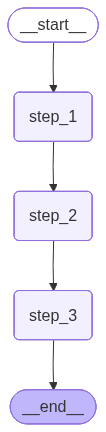

In [7]:
from IPython.display import Image
Image(workflowx.get_graph().draw_mermaid_png())

In [8]:
try:
    print("▶️ Running graph: Please manually interrupt during Step 2...")
    
    # Invoking with a thread_id allows you to resume if it crashes/interrupts
    workflowx.invoke(
        {"input": "Write a post about AI on LinkedIn"}, 
        config={"configurable": {"thread_id": "thread-1"}}
    )
    
except KeyboardInterrupt:
    print("❌ Kernel manually interrupted (crash simulated).")

▶️ Running graph: Please manually interrupt during Step 2...
Step - 1 executed
Step - 2 hanging..... now manually inturrept
❌ Kernel manually interrupted (crash simulated).


In [11]:
workflowx.get_state({"configurable": {"thread_id": "thread-1"}})

StateSnapshot(values={'input': 'Write a post about AI on LinkedIn', 'step1': 'done'}, next=('step_2',), config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f0e166d-4da7-6e7d-8001-4820e5cec89e'}}, metadata={'source': 'loop', 'step': 1, 'parents': {}}, created_at='2025-12-25T07:53:42.248818+00:00', parent_config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f0e166d-4da5-6777-8000-7e42d746f35e'}}, tasks=(PregelTask(id='346adb9a-47ba-76b6-4272-51c1b46e94d2', name='step_2', path=('__pregel_pull', 'step_2'), error=None, interrupts=(), state=None, result=None),), interrupts=())

In [12]:
list(workflowx.get_state_history({"configurable": {"thread_id": "thread-1"}}))

[StateSnapshot(values={'input': 'Write a post about AI on LinkedIn', 'step1': 'done'}, next=('step_2',), config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f0e166d-4da7-6e7d-8001-4820e5cec89e'}}, metadata={'source': 'loop', 'step': 1, 'parents': {}}, created_at='2025-12-25T07:53:42.248818+00:00', parent_config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f0e166d-4da5-6777-8000-7e42d746f35e'}}, tasks=(PregelTask(id='346adb9a-47ba-76b6-4272-51c1b46e94d2', name='step_2', path=('__pregel_pull', 'step_2'), error=None, interrupts=(), state=None, result=None),), interrupts=()),
 StateSnapshot(values={'input': 'Write a post about AI on LinkedIn'}, next=('step_1',), config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f0e166d-4da5-6777-8000-7e42d746f35e'}}, metadata={'source': 'loop', 'step': 0, 'parents': {}}, created_at='2025-12-25T07:53:42.247819+00:00', parent_config={'configura

In [13]:
# re-run to show fault-tolerance (resume)

final_state = workflowx.invoke(
        None, 
        config={"configurable": {"thread_id": "thread-1"}}
    )

final_state

Step - 2 hanging..... now manually inturrept
Step - 3 executed


{'input': 'Write a post about AI on LinkedIn',
 'step1': 'done',
 'step2': 'done',
 'step3': 'done'}

In [14]:
workflowx.get_state({"configurable": {"thread_id": "thread-1"}})

StateSnapshot(values={'input': 'Write a post about AI on LinkedIn', 'step1': 'done', 'step2': 'done', 'step3': 'done'}, next=(), config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f0e1678-2459-61c7-8003-39aa2baf2b5b'}}, metadata={'source': 'loop', 'step': 3, 'parents': {}}, created_at='2025-12-25T07:58:33.196384+00:00', parent_config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f0e1678-2456-6f47-8002-a9738228ea13'}}, tasks=(), interrupts=())

In [15]:
list(workflowx.get_state_history({"configurable": {"thread_id": "thread-1"}}))

[StateSnapshot(values={'input': 'Write a post about AI on LinkedIn', 'step1': 'done', 'step2': 'done', 'step3': 'done'}, next=(), config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f0e1678-2459-61c7-8003-39aa2baf2b5b'}}, metadata={'source': 'loop', 'step': 3, 'parents': {}}, created_at='2025-12-25T07:58:33.196384+00:00', parent_config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f0e1678-2456-6f47-8002-a9738228ea13'}}, tasks=(), interrupts=()),
 StateSnapshot(values={'input': 'Write a post about AI on LinkedIn', 'step1': 'done', 'step2': 'done'}, next=('step_3',), config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f0e1678-2456-6f47-8002-a9738228ea13'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2025-12-25T07:58:33.195501+00:00', parent_config={'configurable': {'thread_id': 'thread-1', 'checkpoint_ns': '', 'checkpoint_id': '1f0e166d-4da7-6e7d-8001-4

# Time Travel example execytion - Advantage of Persistance

In [39]:
from langgraph.graph import StateGraph, START, END
from langgraph.checkpoint.memory import InMemorySaver   # for taking back the conversation of the previous workflow, it save that in ram
from typing import TypedDict, Annotated, Literal
from langchain_groq import ChatGroq
from dotenv import load_dotenv
load_dotenv()

True

In [40]:
# model
model = ChatGroq(model="llama-3.1-8b-instant", temperature=0.4)

In [41]:
# state
class JokeState(TypedDict):

      topic : str
      joke : str
      explanation : str

In [42]:
# functions
def generate_joke(state : JokeState):

      prompt = f"generate a joke based on the topic : {state['topic']}"
      response = model.invoke(prompt)

      return {"joke" : response}

def generate_joke_explanation(state : JokeState):

      prompt = f"generate the explanation of this joke : {state['joke']}"
      response = model.invoke(prompt)

      return {"explanation" : response}

In [43]:
# create graph
graph = StateGraph(JokeState)

# add_node
graph.add_node("generate_joke", generate_joke)
graph.add_node("generate_joke_explanation", generate_joke_explanation)

# add edges
graph.add_edge(START, "generate_joke")
graph.add_edge("generate_joke", "generate_joke_explanation")
graph.add_edge("generate_joke_explanation", END)

# checkpointer
checkpointer = InMemorySaver()

# compile
workflow = graph.compile(checkpointer = checkpointer)

In [44]:
# config
config = {'configurable' : {'thread_id' : '1'}}

# working
initial_state = {
      'topic' : "Pizza"
}

final_state = workflow.invoke(initial_state, config = config)

In [45]:
final_state

{'topic': 'Pizza',
 'joke': AIMessage(content='Why was the pizza in a bad mood? \n\nBecause it was feeling a little crusty.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 20, 'prompt_tokens': 44, 'total_tokens': 64, 'completion_time': 0.028779494, 'completion_tokens_details': None, 'prompt_time': 0.014826652, 'prompt_tokens_details': None, 'queue_time': 0.055606727, 'total_time': 0.043606146}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_ff2b098aaf', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019b54a2-201f-7870-a379-388164a71404-0', usage_metadata={'input_tokens': 44, 'output_tokens': 20, 'total_tokens': 64}),
 'explanation': AIMessage(content='**Joke Explanation:**\n\nThe joke is a play on words, using a pun to create humor. Here\'s a breakdown of the joke:\n\n- **Setup:** "Why was the pizza in a bad mood?"\n  - This is the setup for the joke, asking the listener to consider why a pizza would

In [46]:
workflow.get_state(config)  # this will show you the final state value

StateSnapshot(values={'topic': 'Pizza', 'joke': AIMessage(content='Why was the pizza in a bad mood? \n\nBecause it was feeling a little crusty.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 20, 'prompt_tokens': 44, 'total_tokens': 64, 'completion_time': 0.028779494, 'completion_tokens_details': None, 'prompt_time': 0.014826652, 'prompt_tokens_details': None, 'queue_time': 0.055606727, 'total_time': 0.043606146}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_ff2b098aaf', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019b54a2-201f-7870-a379-388164a71404-0', usage_metadata={'input_tokens': 44, 'output_tokens': 20, 'total_tokens': 64}), 'explanation': AIMessage(content='**Joke Explanation:**\n\nThe joke is a play on words, using a pun to create humor. Here\'s a breakdown of the joke:\n\n- **Setup:** "Why was the pizza in a bad mood?"\n  - This is the setup for the joke, asking the listener to conside

In [47]:
list(workflow.get_state_history(config))  # code to check all the intermediate value

[StateSnapshot(values={'topic': 'Pizza', 'joke': AIMessage(content='Why was the pizza in a bad mood? \n\nBecause it was feeling a little crusty.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 20, 'prompt_tokens': 44, 'total_tokens': 64, 'completion_time': 0.028779494, 'completion_tokens_details': None, 'prompt_time': 0.014826652, 'prompt_tokens_details': None, 'queue_time': 0.055606727, 'total_time': 0.043606146}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_ff2b098aaf', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019b54a2-201f-7870-a379-388164a71404-0', usage_metadata={'input_tokens': 44, 'output_tokens': 20, 'total_tokens': 64}), 'explanation': AIMessage(content='**Joke Explanation:**\n\nThe joke is a play on words, using a pun to create humor. Here\'s a breakdown of the joke:\n\n- **Setup:** "Why was the pizza in a bad mood?"\n  - This is the setup for the joke, asking the listener to consid

----

In [48]:
workflow.get_state({'configurable' : {'thread_id' : '1', 'checkpoint_id': '1f0e1699-37c8-6909-8000-c64c1e1b945b'}})

StateSnapshot(values={}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_id': '1f0e1699-37c8-6909-8000-c64c1e1b945b'}}, metadata=None, created_at=None, parent_config=None, tasks=(), interrupts=())

In [49]:
workflow.invoke(initial_state, config = {'configurable' : {'thread_id' : '1', 'checkpoint_id': '1f0e1699-37c8-6909-8000-c64c1e1b945b'}})

{'topic': 'Pizza',
 'joke': AIMessage(content='Why did the pizza go to the doctor? \n\nBecause it was feeling a little crusty.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 20, 'prompt_tokens': 44, 'total_tokens': 64, 'completion_time': 0.025752211, 'completion_tokens_details': None, 'prompt_time': 0.002041882, 'prompt_tokens_details': None, 'queue_time': 0.065917177, 'total_time': 0.027794093}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_4387d3edbb', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019b54a2-49f7-7563-b328-ec6457fb8af6-0', usage_metadata={'input_tokens': 44, 'output_tokens': 20, 'total_tokens': 64}),
 'explanation': AIMessage(content='Here\'s an explanation of the joke:\n\nThe joke is a play on words. The setup "Why did the pizza go to the doctor?" is a common format for a joke, implying that the pizza is going to the doctor for a medical reason. The punchline "Because it was feel

In [50]:
list(workflow.get_state_history(config))

[StateSnapshot(values={'topic': 'Pizza', 'joke': AIMessage(content='Why did the pizza go to the doctor? \n\nBecause it was feeling a little crusty.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 20, 'prompt_tokens': 44, 'total_tokens': 64, 'completion_time': 0.025752211, 'completion_tokens_details': None, 'prompt_time': 0.002041882, 'prompt_tokens_details': None, 'queue_time': 0.065917177, 'total_time': 0.027794093}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_4387d3edbb', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019b54a2-49f7-7563-b328-ec6457fb8af6-0', usage_metadata={'input_tokens': 44, 'output_tokens': 20, 'total_tokens': 64}), 'explanation': AIMessage(content='Here\'s an explanation of the joke:\n\nThe joke is a play on words. The setup "Why did the pizza go to the doctor?" is a common format for a joke, implying that the pizza is going to the doctor for a medical reason. The punchline 

----
##### Updating State in between

In [51]:
workflow.update_state({'configurable' : {'thread_id' : '1', 'checkpoint_id': '1f0e16c1-6ea7-649a-8000-c0e303788709', 'checkpoint_ns': ''}}, {'topic' : 'samosa'})

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f0e16c4-8d48-683a-8001-eb1bffed16ee'}}

In [52]:
list(workflow.get_state_history(config))

[StateSnapshot(values={'topic': 'samosa'}, next=('generate_joke',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0e16c4-8d48-683a-8001-eb1bffed16ee'}}, metadata={'source': 'update', 'step': 1, 'parents': {}}, created_at='2025-12-25T08:32:44.309100+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0e16c1-6ea7-649a-8000-c0e303788709'}}, tasks=(PregelTask(id='e52b5afe-640f-7e42-cfd3-c2d8e598294a', name='generate_joke', path=('__pregel_pull', 'generate_joke'), error=None, interrupts=(), state=None, result=None),), interrupts=()),
 StateSnapshot(values={'topic': 'Pizza', 'joke': AIMessage(content='Why did the pizza go to the doctor? \n\nBecause it was feeling a little crusty.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 20, 'prompt_tokens': 44, 'total_tokens': 64, 'completion_time': 0.025752211, 'completion_tokens_details': None, 'prompt_time': 0.002041882, 'prompt_toke

In [53]:
workflow.invoke(None, config = {'configurable' : {'thread_id' : '1', 'checkpoint_id': '1f0e16c4-8d48-683a-8001-eb1bffed16ee'}})

{'topic': 'samosa',
 'joke': AIMessage(content='Why did the samosa go to therapy? \n\nBecause it was feeling crumby and had a lot of filling issues.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 26, 'prompt_tokens': 45, 'total_tokens': 71, 'completion_time': 0.036173208, 'completion_tokens_details': None, 'prompt_time': 0.002866931, 'prompt_tokens_details': None, 'queue_time': 0.050612439, 'total_time': 0.039040139}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_f757f4b0bf', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019b54a4-516f-7d70-a875-a7f901e47e59-0', usage_metadata={'input_tokens': 45, 'output_tokens': 26, 'total_tokens': 71}),
 'explanation': AIMessage(content='**The Joke Explanation**\n\nThe joke is a play on words, using a pun to create humor. Here\'s a breakdown of the joke:\n\n- **Setup**: The joke starts with the question, "Why did the samosa go to therapy?" This is a common joke 

In [54]:
list(workflow.get_state_history(config))

[StateSnapshot(values={'topic': 'samosa', 'joke': AIMessage(content='Why did the samosa go to therapy? \n\nBecause it was feeling crumby and had a lot of filling issues.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 26, 'prompt_tokens': 45, 'total_tokens': 71, 'completion_time': 0.036173208, 'completion_tokens_details': None, 'prompt_time': 0.002866931, 'prompt_tokens_details': None, 'queue_time': 0.050612439, 'total_time': 0.039040139}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_f757f4b0bf', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--019b54a4-516f-7d70-a875-a7f901e47e59-0', usage_metadata={'input_tokens': 45, 'output_tokens': 26, 'total_tokens': 71}), 'explanation': AIMessage(content='**The Joke Explanation**\n\nThe joke is a play on words, using a pun to create humor. Here\'s a breakdown of the joke:\n\n- **Setup**: The joke starts with the question, "Why did the samosa go to therapy?" Th